In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


df_crimes = pd.read_csv("cleanup_Crime_Dataset.csv")
df_suspects = pd.read_csv("cleanup_suspects.csv")

Welche Monster begingen in der Vergangenheit ähnliche Verbrechen?

(Kidnapping, am Tag, mit Messer, im Dorf, Knochen zurückgelassen) mind 4/5 erfüllt

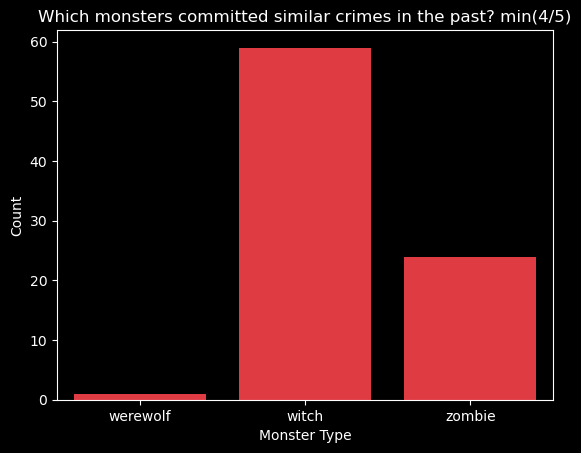

In [73]:
criteria = [
    df_crimes["Crime Weapon"] == "knife",
    df_crimes["Time of Day"] == "day",
    df_crimes["Region"] == "village",
    df_crimes["Crime Type"] == "kidnapping",
    df_crimes["Evidence Found"] == "bones"
]

df_very_similar_crime = df_crimes[sum(criteria) >= 4]

df_very_similar_crime = (
    df_very_similar_crime.groupby("Monster involved")["Index_Crimes"].count()
)
df_very_similar_crime.plot(kind="bar")

# Formatting
plt.style.use("dark_background")
bars = plt.bar(df_very_similar_crime.index, df_very_similar_crime.values, color="#df3b43")
plt.xlabel("Monster Type", color="white")
plt.ylabel("Count", color="white")
plt.xticks(rotation=0, color="white")
plt.title("Which monsters committed similar crimes in the past? min(4/5)", color="white")
plt.show()

Welche Monster begingen in der Vergangenheit sehr ähnliche Verbrechen?

(Kidnapping, am Tag, mit Messer, im Dorf, Knochen zurückgelassen) 5/5 erfüllt

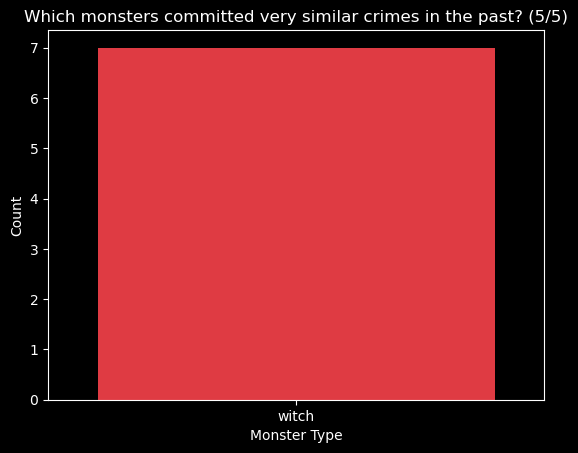

In [74]:
df_very_similar_crime = df_crimes.copy()
df_very_similar_crime = df_very_similar_crime[df_crimes['Crime Weapon'] == 'knife']
df_very_similar_crime = df_very_similar_crime[df_very_similar_crime['Time of Day'] == 'day']
df_very_similar_crime = df_very_similar_crime[df_very_similar_crime['Region'] == 'village']
df_very_similar_crime = df_very_similar_crime[df_very_similar_crime['Crime Type'] == 'kidnapping']
df_very_similar_crime = df_very_similar_crime[df_very_similar_crime['Evidence Found'] == 'bones']
df_very_similar_crime = df_very_similar_crime.groupby("Monster involved")["Index_Crimes"].count()
df_very_similar_crime.plot(kind='bar')

# Formatting:
plt.style.use("dark_background")
bars = plt.bar(df_very_similar_crime.index, df_very_similar_crime.values, color="#df3b43")
plt.xlabel("Monster Type", color="white")
plt.ylabel("Count", color="white")
plt.xticks(rotation=0, color="white")
plt.title("Which monsters committed very similar crimes in the past? (5/5)", color="white")
plt.show()

Welche Monster begehen die meisten Straftaten ?

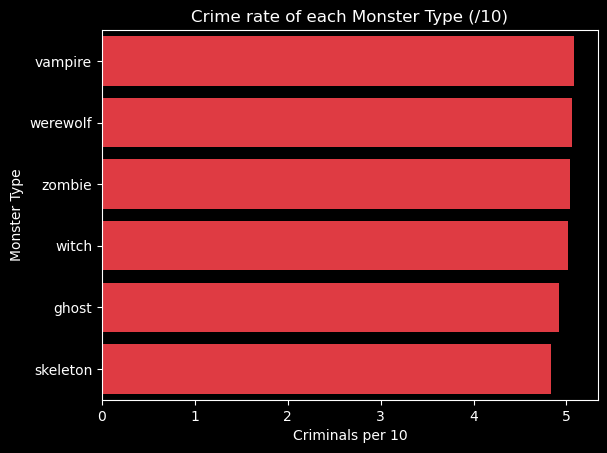

In [75]:
df_crime_rates = df_suspects.copy()
df_crime_rates = (
    df_crime_rates.groupby("Monster")["Criminal record"]
    .apply(lambda x: (x == 'yes').sum() / len(x) * 10)
    .sort_values(ascending=True)
)
df_crime_rates.plot(kind='barh')

# Formatting:
bars = plt.barh(df_crime_rates.index, df_crime_rates.values, color="#df3b43")
plt.xlabel("Criminals per 10", color="white")
plt.ylabel("Monster Type", color="white")
plt.xticks(rotation=0, color="white")
plt.title("Crime rate of each Monster Type (/10)", color="white")
plt.show()

Welche Monster Typen sind am fähigsten Verbrechen zu begehen?

(Speed : Strength = 50 : 50)

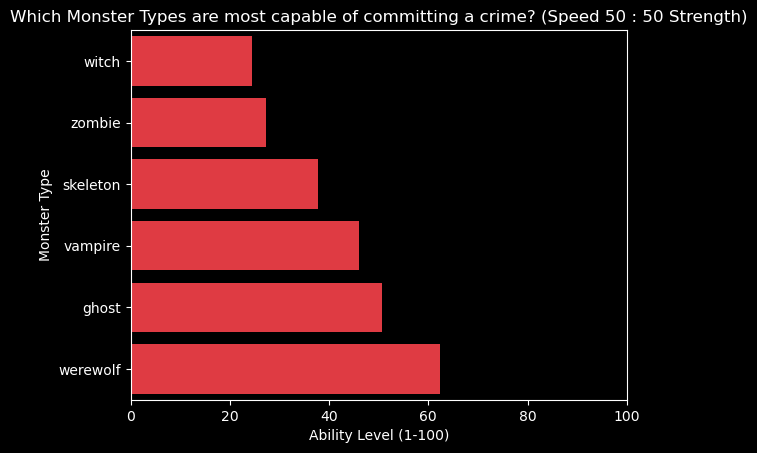

In [76]:
df_avg_ability = df_suspects.copy()

df_avg_ability["Strength_norm"] = (
    df_avg_ability["Strength Level"] - df_avg_ability["Strength Level"].min()
) / (df_avg_ability["Strength Level"].max() - df_avg_ability["Strength Level"].min())

df_avg_ability["Speed_norm"] = (
    df_avg_ability["Speed Level"] - df_avg_ability["Speed Level"].min()
) / (df_avg_ability["Speed Level"].max() - df_avg_ability["Speed Level"].min())

df_avg_ability["Ability Score"] = ((df_avg_ability["Strength_norm"] + df_avg_ability["Speed_norm"]) / 2) * 99 + 1

df_avg_ability = df_avg_ability.groupby('Monster')['Ability Score'].mean().sort_values(ascending=False)
df_avg_ability.plot(kind='barh')

# Formatting:
bars = plt.barh(df_avg_ability.index, df_avg_ability.values, color="#df3b43")
plt.xlabel("Ability Level (1-100)", color="white")
plt.ylabel("Monster Type", color="white")
plt.xticks(rotation=0, color="white")
plt.title("Which Monster Types are most capable of committing a crime? (Speed 50 : 50 Strength)", color="white")
plt.xlim(0, 100)
plt.show()

Fähigkeit in Relation zu Häufigkeit pro Monster Typ

(Fähigkeit 50 : 50 Häufigkeit)

In [77]:
df_avg_ability_copy = df_avg_ability.copy()
df_avg_ability_copy = df_avg_ability_copy.reset_index()
df_avg_ability_copy.columns = ['Monster', 'Ability Score']

In [78]:
df_crime_rates_copy = df_crime_rates.copy()
df_crime_rates_copy = df_crime_rates_copy.reset_index()
df_crime_rates_copy.columns = ['Monster',"Crime Rate" ]

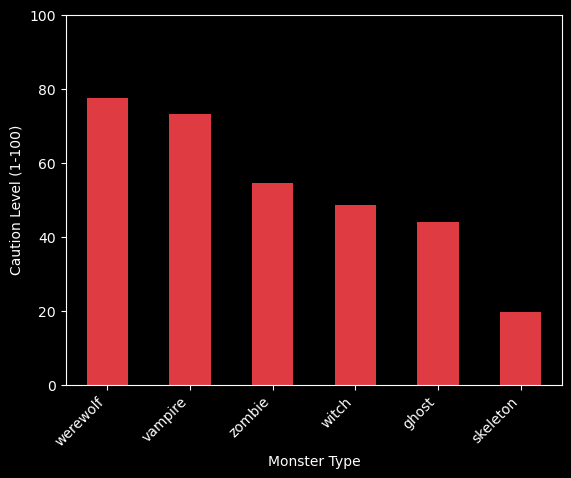

In [79]:
df_caution_level = df_suspects.merge(df_avg_ability, on="Monster", how="left")
df_caution_level = df_caution_level.merge(df_crime_rates, on="Monster", how="left")

df_caution_level["Crime_Level_norm"] = (
    df_caution_level["Criminal record_y"] - df_caution_level["Criminal record_y"].min()
) / (df_caution_level["Criminal record_y"].max() - df_caution_level["Criminal record_y"].min())

df_caution_level['ability_norm'] = df_caution_level['Ability Score'] / 100
 
df_caution_level["Caution_Level"] = ((df_caution_level["ability_norm"] + df_caution_level["Crime_Level_norm"]) / 2) * 99 + 1

df_caution_level = df_caution_level.groupby('Monster')[['Caution_Level']].mean().sort_values(by='Caution_Level', ascending=False)
df_caution_level.plot(kind='bar', color="#df3b43")

# Formatting:
plt.style.use("dark_background")
plt.xlabel("Monster Type", color="white")
plt.ylabel("Caution Level (1-100)", color="white")
plt.xticks(rotation=45, color="white", ha='right')
plt.title("", color="white")
plt.legend().remove()
plt.ylim(0,100)
plt.show()

Boxplott zu Alter unter Verbrechern

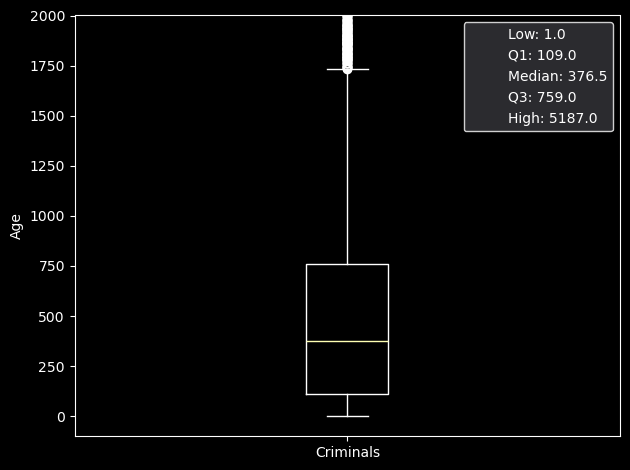

In [80]:
df_criminals = df_suspects.copy()
df_criminals = df_criminals[df_criminals['Criminal record'] == 'yes']
age_plot = plt.boxplot(df_criminals["Age"])

df_criminals = df_suspects[df_suspects["Criminal record"] == 'yes']

q1 = df_criminals["Age"].quantile(0.25)
median = df_criminals["Age"].median()
q3 = df_criminals["Age"].quantile(0.75)
low = df_criminals["Age"].min()
high = df_criminals["Age"].max()

labels = [
    f"Low: {low:.1f}",
    f"Q1: {q1:.1f}",
    f"Median: {median:.1f}",
    f"Q3: {q3:.1f}",
    f"High: {high:.1f}",
]
handles = [mpatches.Patch(color="none", label=lbl) for lbl in labels]
plt.legend(handles=handles, facecolor="#37373b", edgecolor="white", labelcolor="white", loc="upper right")

plt.ylabel("Age", color="white")
plt.xticks([1], ["Criminals"], color="white")
plt.ylim(-100, 2000)
plt.tight_layout()
plt.show()


Ausschlusskriterien der Suspects (Allergien)

In [81]:
df_possible_criminals = df_suspects.copy()
df_possible_criminals = df_possible_criminals[df_possible_criminals['Allergy'] != 'sunlight']
df_possible_criminals = df_possible_criminals[df_possible_criminals['Age'] > 12]
df_possible_criminals

,importtIndex_Monster,Monster,Criminal record,Age,Gender,Height in cm,Speed Level,Strength Level,Allergy,Favorite Food,Age Bin
0,2101,witch,no,526.0,f,197.0,0.16,0.1,hazelnut,brain,adult
1,9299,zombie,yes,46.0,m,184.0,0.20,0.7,cat hair,humans,baby
3,6773,vampire,no,551.0,f,167.0,0.43,0.6,garlic,humans,adult
4,9624,zombie,yes,150.0,f,176.0,0.17,0.1,pumpkin,brain,young adult
5,7494,zombie,yes,100.0,m,180.0,0.20,0.1,garlic,pesto pasta,teen
...,...,...,...,...,...,...,...,...,...,...,...
9995,4633,skeleton,yes,1836.0,f,152.0,0.01,0.2,silver,rats,old
9996,6713,werewolf,no,77.0,f,192.0,0.74,0.4,silver,rats,baby
9997,5535,witch,no,484.0,m,175.0,0.18,0.2,garlic,pesto pasta,adult
9998,8635,vampire,no,824.0,f,152.0,0.31,0.5,silver,lasagna,middle age


Motivationen der Suspects (favorite food)

In [82]:
df_suspects_with_motivation = df_suspects.copy()
df_suspects_with_motivation = df_suspects_with_motivation[df_suspects_with_motivation["Favorite Food"].isin(["brain", "humans"])]
df_suspects_with_motivation


,importtIndex_Monster,Monster,Criminal record,Age,Gender,Height in cm,Speed Level,Strength Level,Allergy,Favorite Food,Age Bin
0,2101,witch,no,526.0,f,197.0,0.16,0.1,hazelnut,brain,adult
1,9299,zombie,yes,46.0,m,184.0,0.20,0.7,cat hair,humans,baby
3,6773,vampire,no,551.0,f,167.0,0.43,0.6,garlic,humans,adult
4,9624,zombie,yes,150.0,f,176.0,0.17,0.1,pumpkin,brain,young adult
7,9574,skeleton,no,999.0,f,184.0,0.38,0.3,silver,brain,middle age
...,...,...,...,...,...,...,...,...,...,...,...
9959,3447,witch,no,573.0,m,153.0,0.26,0.5,hazelnut,humans,adult
9968,3166,witch,no,431.0,f,193.0,0.16,0.6,hazelnut,brain,adult
9971,9955,zombie,yes,86.0,f,158.0,0.21,0.3,sunlight,humans,teen
9978,659,vampire,yes,521.0,m,165.0,0.54,0.1,garlic,humans,adult
